# ECE531 Computer Vision Assignment 2
27/10/2020, Abdullah Gul University

* Do not use Jupyter Notebook. Instead, use JupyterLab. Otherwise TA might not be able to see your answers.
* You are not allowed to manually give any position or draw any shape. The algorithms that you develop should work regardless of the position of the objects.
* You are not allowed to use circle or any other shape finding functions.
* You can use filtering for any purpose such as eliminating the noise. 
* Remember to push your changes to github occasionally (not only commit to your local git server)
* http://www.mazegenerator.net/Examples.aspx 

# Introduction
We have the following images:

In [5]:
#initializations
# if using notebook:
# %matplotlib notebook
# if using jupyterlab:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import platform
import skimage
import scipy

from skimage.morphology import disk, erosion, reconstruction
from skimage.util import img_as_ubyte
from scipy import ndimage

plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['image.cmap'] = "gray"
print ("OpenCV version: ", cv2.__version__)
print ("Skimage version: ", skimage.__version__)
print ("Scipy version: ", scipy.__version__)
print ("Matplotlib version: ", matplotlib.__version__)
print ("Python version: ", platform.python_version())

OpenCV version:  4.5.5
Skimage version:  0.16.2
Scipy version:  1.7.3
Matplotlib version:  3.4.3
Python version:  3.9.12


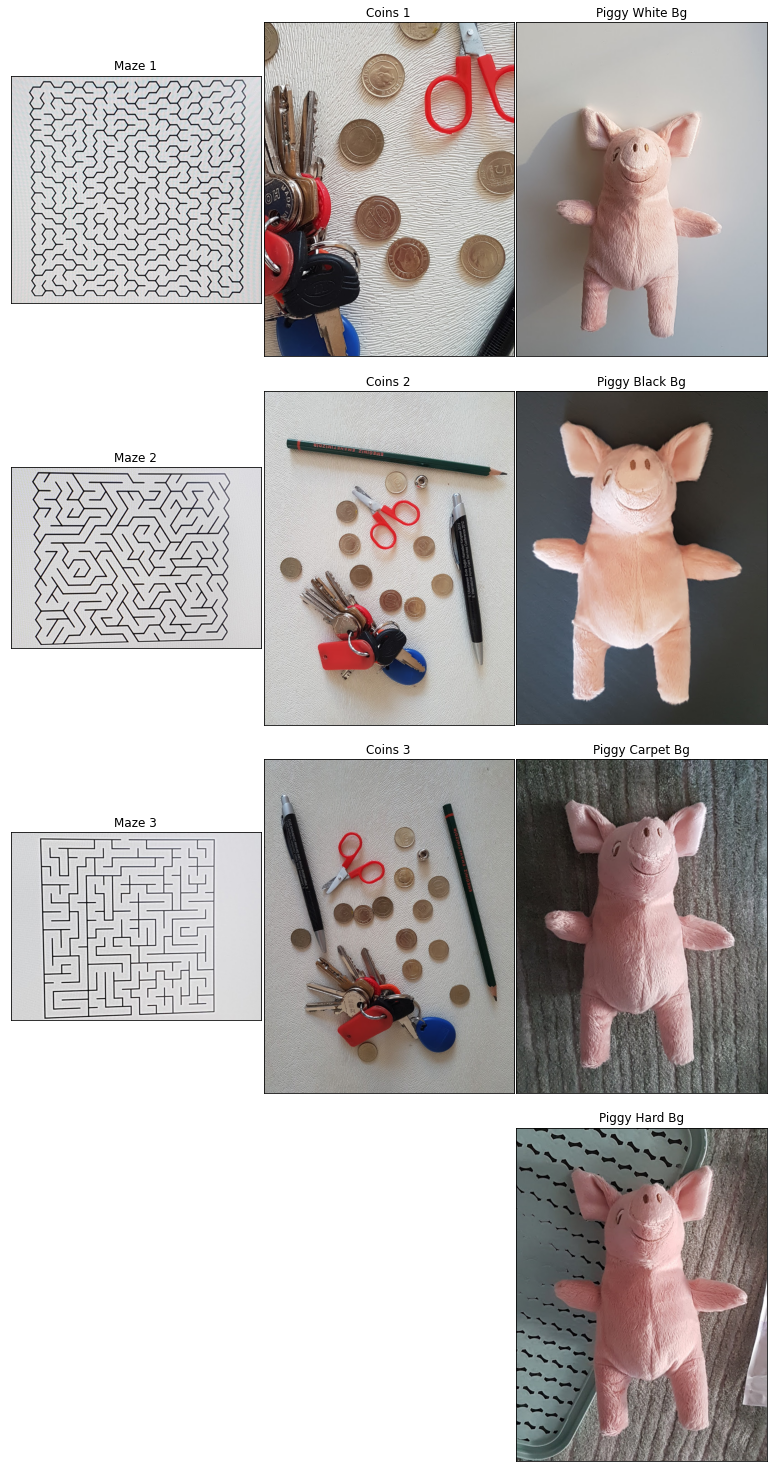

In [6]:
# Loading a sample image
img_maze_1 = cv2.imread('sample_images/maze_1.jpg')[...,::-1]
img_coins_1 = cv2.imread('sample_images/coins_1.jpg')[...,::-1]
img_piggy_white = cv2.imread('sample_images/piggy_white.jpg')[...,::-1]
img_maze_2 = cv2.imread('sample_images/maze_2.jpg')[...,::-1]
img_coins_2 = cv2.imread('sample_images/coins_2.jpg')[...,::-1]
img_piggy_black = cv2.imread('sample_images/piggy_black.jpg')[...,::-1]
img_maze_3 = cv2.imread('sample_images/maze_3.jpg')[...,::-1]
img_coins_3 = cv2.imread('sample_images/coins_3.jpg')[...,::-1]
img_piggy_hard = cv2.imread('sample_images/piggy_hard.jpg')[...,::-1]
img_piggy_carpet = cv2.imread('sample_images/piggy_carpet.jpg')[...,::-1]



fig, axarr =  plt.subplots(4,3,figsize=(15, 25))
plt.setp(axarr, xticks=[], yticks=[])
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.1)

axarr[0,0].imshow(img_maze_1)
axarr[0,0].set_title('Maze 1')
axarr[0,1].imshow(img_coins_1)
axarr[0,1].set_title('Coins 1')
axarr[0,2].imshow(img_piggy_white)
axarr[0,2].set_title('Piggy White Bg')
axarr[1,0].imshow(img_maze_2)
axarr[1,0].set_title('Maze 2')
axarr[1,1].imshow(img_coins_2)
axarr[1,1].set_title('Coins 2')
axarr[1,2].imshow(img_piggy_black)
axarr[1,2].set_title('Piggy Black Bg')
axarr[2,0].imshow(img_maze_3)
axarr[2,0].set_title('Maze 3')
axarr[2,1].imshow(img_coins_3)
axarr[2,1].set_title('Coins 3')
axarr[2,2].imshow(img_piggy_carpet)
axarr[2,2].set_title('Piggy Carpet Bg')
axarr[3,0].set_axis_off()
axarr[3,1].set_axis_off()
axarr[3,2].imshow(img_piggy_hard)
axarr[3,2].set_title('Piggy Hard Bg');

## Question 0 (A Sample question with the answer)
**a)** Apply a global threshold to "piggy black" image and obtain a binary mask. Show the mask you found.(If a global thresholding is not sufficient, you can resort to other tools.)   
**b)** Apply your mask onto the image to mask out the piggy. Show the resulted image (we should only see the piggy, the rest should be pure black.)  
**c)** Draw a thick green border around the piggy.


## Answer 0

In [ ]:
img_piggy_black_grayscale = cv2.imread('sample_images/piggy_black.jpg', cv2.IMREAD_GRAYSCALE)

# Applying a global threshold. 100 value is set manually
ret, img1_binary = cv2.threshold(img_piggy_black_grayscale,105,255,cv2.THRESH_BINARY)

# Apply morphological operations to remove noise and fill the gaps inside the piglet
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(150,150))
img1_eroded = cv2.morphologyEx(img1_binary, cv2.MORPH_ERODE, strel)
# img1_opened = cv2.morphologyEx(img1_binary, cv2.MORPH_OPEN, strel)
# img1_closed = cv2.morphologyEx(img1_binary, cv2.MORPH_CLOSE, strel)

# skimage strel
skimage_strel = disk(5)
img1_noise_removed = reconstruction(img1_eroded, img1_binary, method='dilation', selem=skimage_strel)

# closing nose holes
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
img1_holes_filled = np.uint8(ndimage.binary_fill_holes(img1_noise_removed)*255)
#img1_closed = cv2.morphologyEx(img1_noise_removed, cv2.MORPH_CLOSE, strel)


# convert skimage to cv2
#tmp = exposure.rescale_intensity(img1_closed, out_range=(-1, 1))
#mask = img_as_ubyte(tmp)
mask = img1_holes_filled

# Apply the mask
img1_masked = cv2.bitwise_and(img_piggy_black, img_piggy_black, mask = mask)

# Extract the border
# My approach: I will first enlarge the mask 5 pixel then extract it from itself. 
# Then I will use this thick border to draw green border around the piglet
# 1 Enlarge the mask
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
mask_dilated = cv2.morphologyEx(mask, cv2.MORPH_DILATE, strel)
mask_border = cv2.bitwise_not(mask, mask=mask_dilated)


zeros = np.zeros_like(mask_border)
green_border = np.stack((zeros,mask_border,zeros),axis=2)

piglet_w_green_border = cv2.add(green_border,img_piggy_black) 

# Plot the results
fig, axarr =  plt.subplots(3,3,figsize=(20, 25))
plt.setp(axarr, xticks=[], yticks=[])
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.1)
axarr[0,0].imshow(img_piggy_black)
axarr[0,0].set_title('The Original Piglet')
axarr[0,1].imshow(img1_binary)
axarr[0,1].set_title('After the threshold')
#axarr[0,2].imshow(img1_opened)
#axarr[0,2].set_title('After opening')
axarr[0,2].imshow(img1_eroded)
axarr[0,2].set_title('After erosion')
axarr[1,0].imshow(img1_noise_removed)
axarr[1,0].set_title('After reconstruction')
axarr[1,1].imshow(img1_holes_filled)
axarr[1,1].set_title('After Fillin the Holes _ The Mask')
axarr[1,2].imshow(img1_masked)
axarr[1,2].set_title('Masked Piglet')
axarr[2,0].imshow(mask_dilated)
axarr[2,0].set_title('Dilated mask');
axarr[2,1].imshow(mask_border)
axarr[2,1].set_title('Mask border');
axarr[2,2].imshow(piglet_w_green_border)
axarr[2,2].set_title('Piglet w Green Border');

plt.figure(figsize=(40,40))
plt.setp(matplotlib.pyplot.gcf().gca(), xticks=[], yticks=[])
plt.imshow(piglet_w_green_border);

## Question 1
Repeat the Question 0 for image "piggy **white**"

In [45]:
img_piggy_white_grayscale = cv2.imread('sample_images/piggy_white.jpg', cv2.IMREAD_GRAYSCALE)

# Applying a global treshold
ret2,img_binary_white = cv2.threshold(img_piggy_white_grayscale, 200,255, cv2.THRESH_TRIANGLE)

# Apply morphological operations to remove noise and fill the gaps inside the piglet
stre_white = cv2.getStructuringElement(cv2.MORPH_ERODE,(10,10))
img_eroded_white = cv2.morphologyEx(img_binary_white, cv2.MORPH_ERODE, stre_white)

# skimage strel
skimage_stre_white = disk(5)
img_noise_removed_white = reconstruction(img_eroded_white, img_binary_white, method='dilation', selem=skimage_stre_white)

# closing nose holes
stre_white = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
img_holes_filled_white = np.uint8(ndimage.binary_fill_holes(img_noise_removed_white)*255)

# convert skimage to cv2
mask_white = img_holes_filled_white

# Apply the mask
img_masked_white = cv2.bitwise_and(img_piggy_white, img_piggy_white, mask = mask_white)

# Extract the border
stre_white = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
mask_dilated_white= cv2.morphologyEx(mask_white, cv2.MORPH_DILATE, stre_white)
mask_border_white = cv2.bitwise_not(mask_white, mask=mask_dilated_white)

zeros_white = np.zeros_like(mask_border_white)
green_border_white = np.stack((zeros_white,mask_border_white,zeros_white),axis=2)

piglet_w_green_border_white = cv2.add(green_border_white,img_piggy_white) 

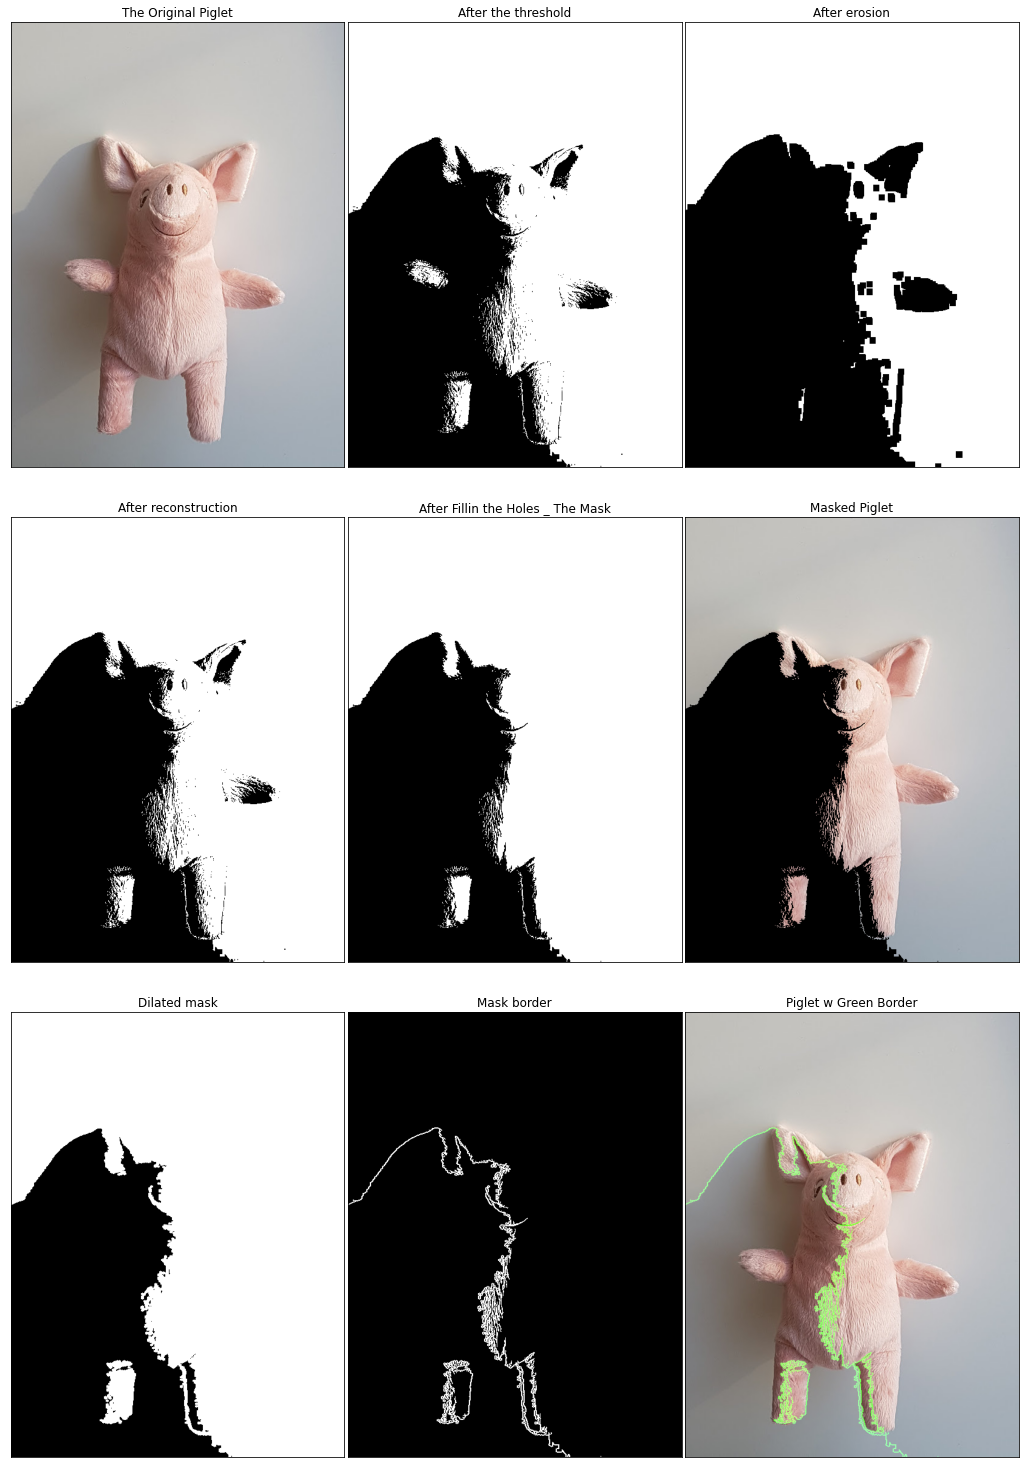

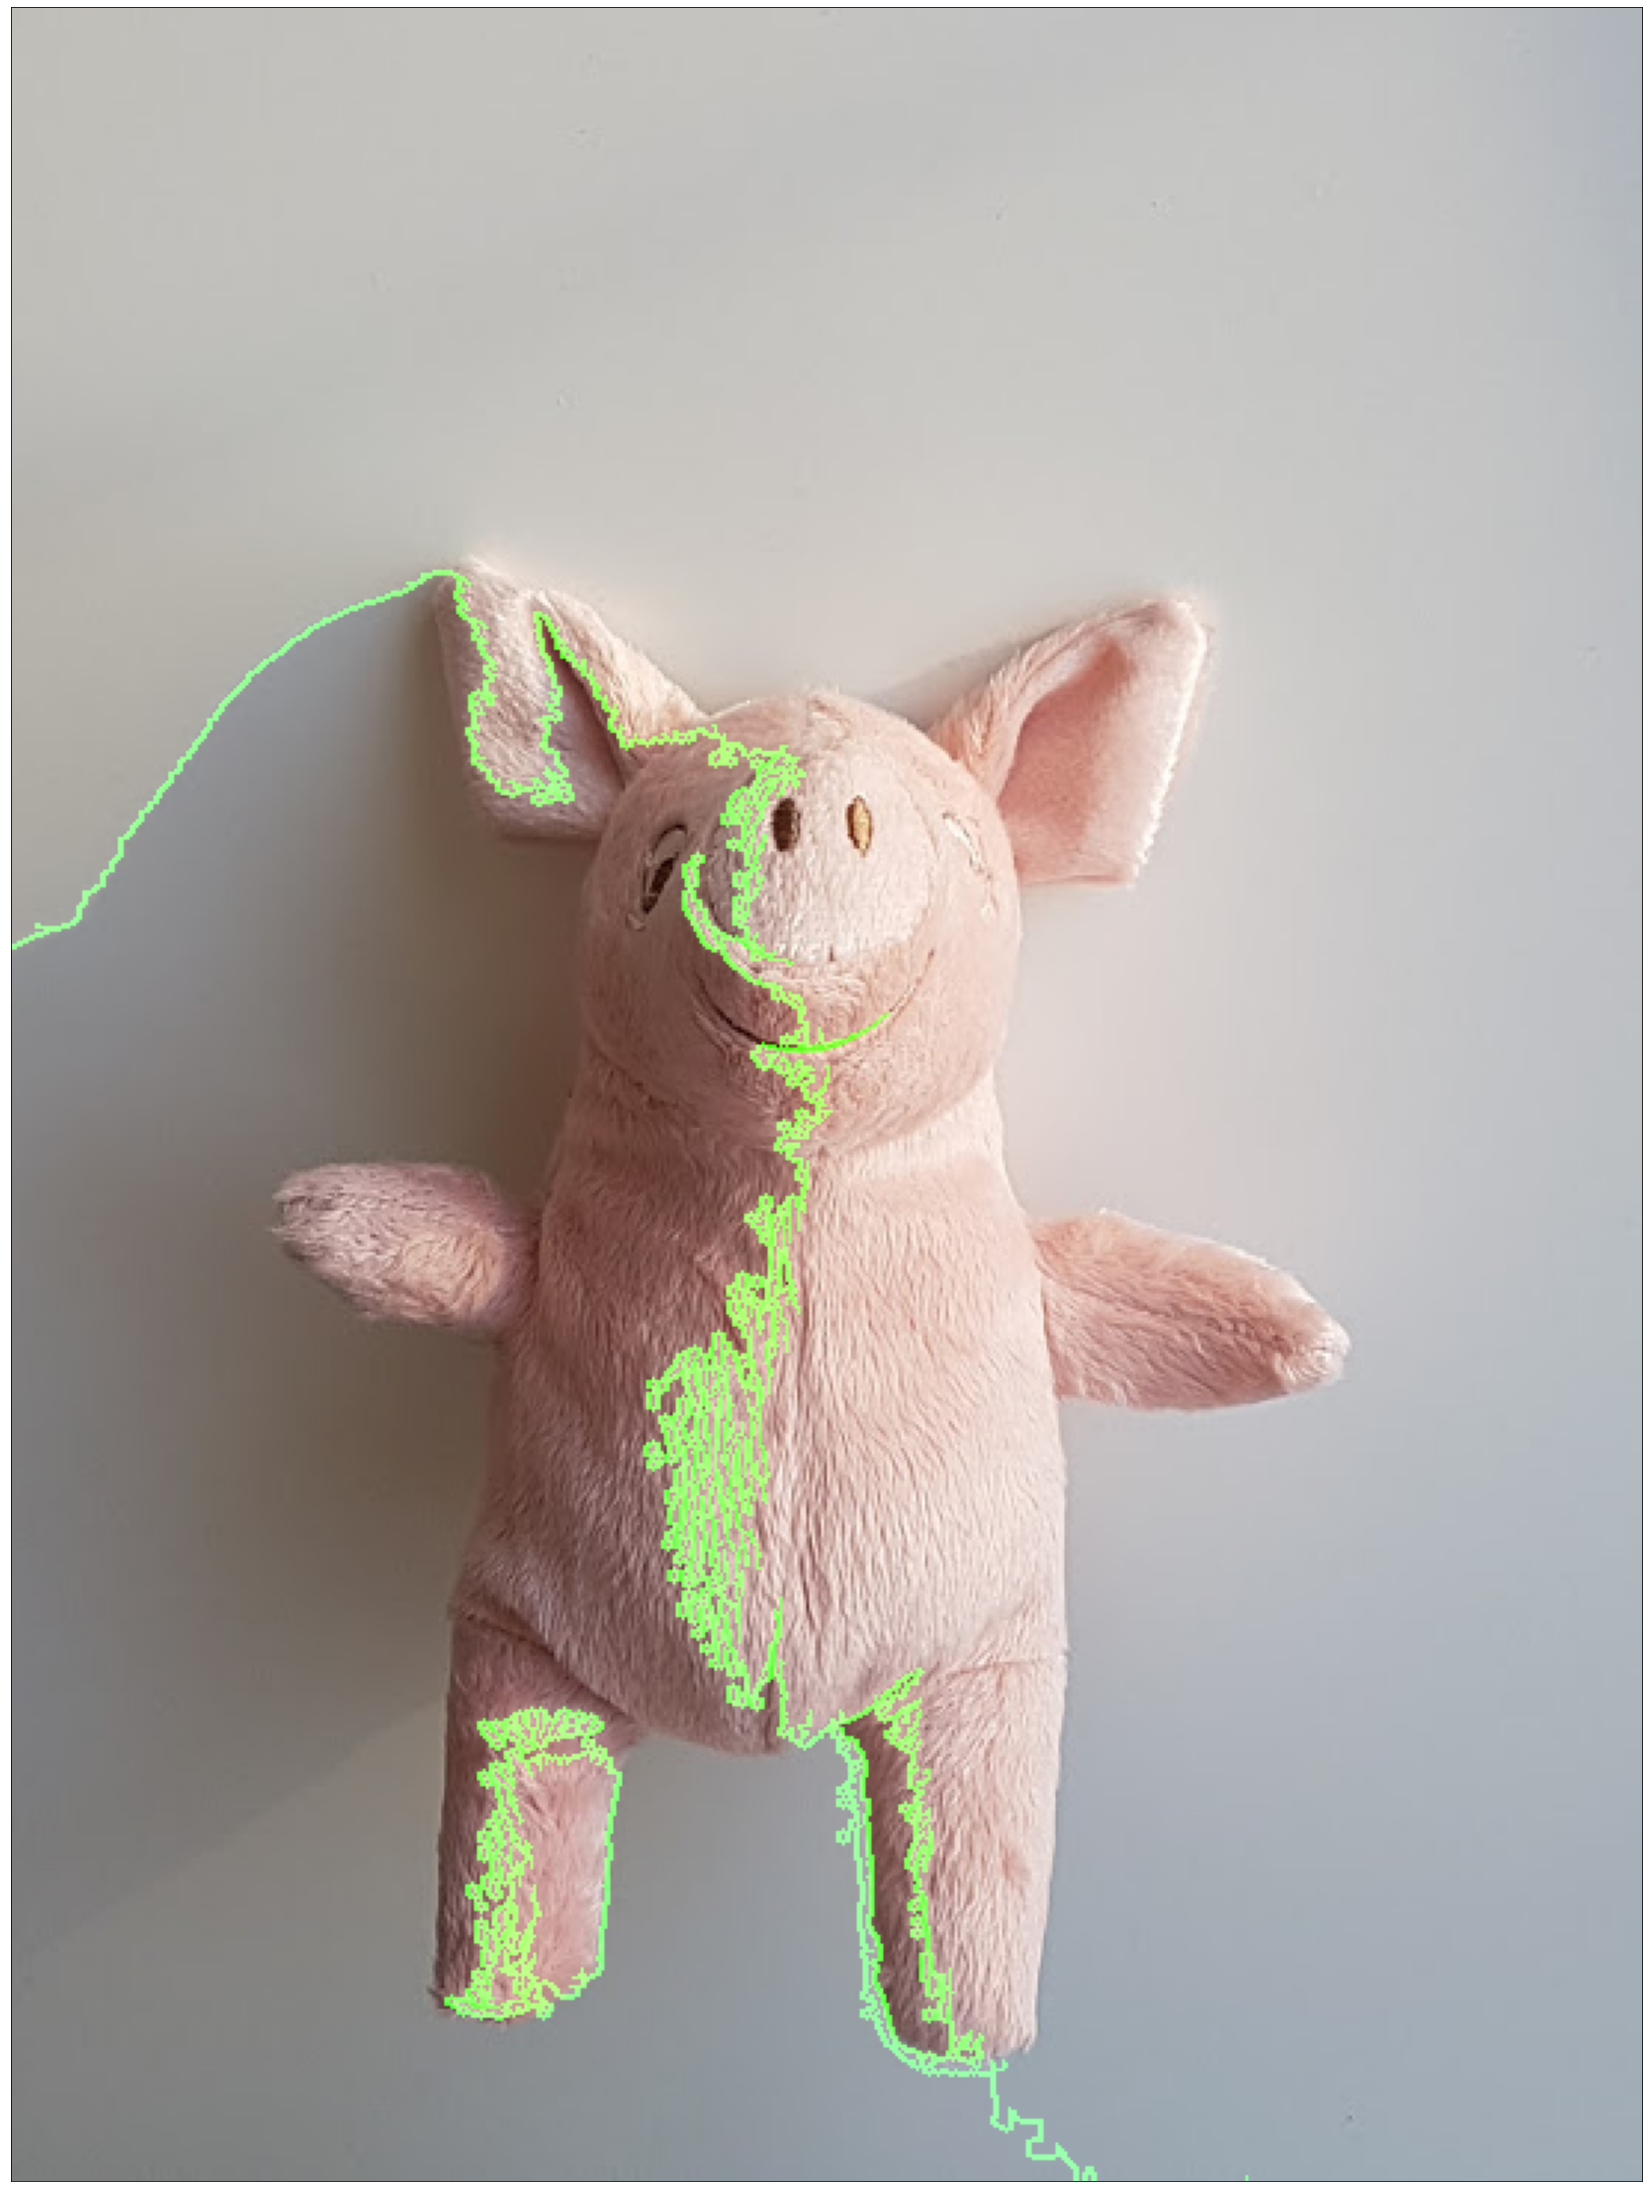

In [46]:
# Plot the results
fig, axarr =  plt.subplots(3,3,figsize=(20, 25))
plt.setp(axarr, xticks=[], yticks=[])
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.1)
axarr[0,0].imshow(img_piggy_white)
axarr[0,0].set_title('The Original Piglet')
axarr[0,1].imshow(img_binary_white)
axarr[0,1].set_title('After the threshold')
#axarr[0,2].imshow(img1_opened)
#axarr[0,2].set_title('After opening')
axarr[0,2].imshow(img_eroded_white)
axarr[0,2].set_title('After erosion')
axarr[1,0].imshow(img_noise_removed_white)
axarr[1,0].set_title('After reconstruction')
axarr[1,1].imshow(img_holes_filled_white)
axarr[1,1].set_title('After Fillin the Holes _ The Mask')
axarr[1,2].imshow(img_masked_white)
axarr[1,2].set_title('Masked Piglet')
axarr[2,0].imshow(mask_dilated_white)
axarr[2,0].set_title('Dilated mask');
axarr[2,1].imshow(mask_border_white)
axarr[2,1].set_title('Mask border');
axarr[2,2].imshow(piglet_w_green_border_white)
axarr[2,2].set_title('Piglet w Green Border');

plt.figure(figsize=(40,40))
plt.setp(matplotlib.pyplot.gcf().gca(), xticks=[], yticks=[])
plt.imshow(piglet_w_green_border_white);

## Question 2
Repeat the Question 0 for image "piggy **carpet**"

## Question 3
Repeat the Question 0 for image "piggy **hard**"

## Question 4
a) Count the number of coins in "Coins 2" image.  
b) Count the number of coins in "Coins 3" image.  

# Question 5
Count the number of large and small coins separately on coin images 2 and 3.

## Question 6 (hard)
Mask the coins which are not fully visible

## Question 7
Write a python function which takes a maze as input and finds it's enterance and exit points. Show the output on the image. Use the given 3 maze images to show your result.

## Question 8
Write a **python function** which takes a maze image as argument and solves the maze, superimposes the result on the maze to show the solution. You can use the function you wrote in the previous question to find the entering and exit points of the maze. Use the given 3 maze images to show your result.

## Question 9
Use Top hat or Bottom hat operation to fix uneven illumination on Piggy White and Coins 3 images. Show your results.

## Question 10
a) Find the edges of coins 1 image using **Sobel** filter. Show your result.  
b) Apply a blurring filter to coins 1 image and than repeat a). Show your result and discuss what happens if you apply edge finding after blurring.
c) Apply a grayscale morphological closing to eliminate the nose and eye holes of the piglet in Piggy black image.